In [13]:
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Pick a file
file_path = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015/02010028rest 20160317 1538..mat"

# Load and extract EEG
mat = loadmat(file_path)
print(mat)

{'__header__': b'Net Station 4.0 MAT-file, Platform: MAC2, Created on: 160810/20:03:11.000', '__version__': '1.0', '__globals__': [], 'a02010028rest_20160317_1538mat': array([[  5121.61816406,   5246.33007812,   5262.22607422, ...,
          4026.9543457 ,   4149.80371094,   4131.05029297],
       [-26525.05664062, -26373.9296875 , -26385.03320312, ...,
        -53770.39453125, -53627.75390625, -53672.296875  ],
       [   924.04064941,   1050.89916992,   1064.85974121, ...,
          1096.9453125 ,   1221.03613281,   1207.51025391],
       ...,
       [   406.12445068,    567.24206543,    550.46343994, ...,
          -374.44009399,   -221.37391663,   -282.12756348],
       [  1367.74133301,   1526.58312988,   1509.29345703, ...,
           857.675354  ,   1007.1932373 ,    953.49945068],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]], dtype='>f8'), 'samplingRate': array([[250.]], dtype='>f8'), 'Impedances_0':

In [14]:
print(mat['a02010028rest_20160317_1538mat'].shape)
mat['a02010028rest_20160317_1538mat']

(129, 75114)


array([[  5121.61816406,   5246.33007812,   5262.22607422, ...,
          4026.9543457 ,   4149.80371094,   4131.05029297],
       [-26525.05664062, -26373.9296875 , -26385.03320312, ...,
        -53770.39453125, -53627.75390625, -53672.296875  ],
       [   924.04064941,   1050.89916992,   1064.85974121, ...,
          1096.9453125 ,   1221.03613281,   1207.51025391],
       ...,
       [   406.12445068,    567.24206543,    550.46343994, ...,
          -374.44009399,   -221.37391663,   -282.12756348],
       [  1367.74133301,   1526.58312988,   1509.29345703, ...,
           857.675354  ,   1007.1932373 ,    953.49945068],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]], dtype='>f8')

In [15]:
# Show all keys and shapes
for k, v in mat.items():
    print(f"{k}: type={type(v)}, shape={getattr(v, 'shape', 'N/A')}")

__header__: type=<class 'bytes'>, shape=N/A
__version__: type=<class 'str'>, shape=N/A
__globals__: type=<class 'list'>, shape=N/A
a02010028rest_20160317_1538mat: type=<class 'numpy.ndarray'>, shape=(129, 75114)
samplingRate: type=<class 'numpy.ndarray'>, shape=(1, 1)
Impedances_0: type=<class 'numpy.ndarray'>, shape=(129, 1)


In [16]:
eeg_data = next((v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 2), None)
print(f"eeg_data shape: {eeg_data.shape}")
print(f"eeg_data sample:\n{eeg_data[:3, :10]}")  # first 3 channels, 10 time points

eeg_data shape: (129, 75114)
eeg_data sample:
[[  5121.61816406   5246.33007812   5262.22607422   5134.64453125
    5069.14111328   5126.20996094   5250.96191406   5266.04003906
    5143.26269531   5070.66748047]
 [-26525.05664062 -26373.9296875  -26385.03320312 -26561.54101562
  -26623.00976562 -26525.14257812 -26372.3515625  -26380.2890625
  -26553.1875     -26623.7109375 ]
 [   924.04064941   1050.89916992   1064.85974121    921.56176758
     851.65765381    919.56469727   1048.24377441   1067.79516602
     929.18328857    855.41638184]]


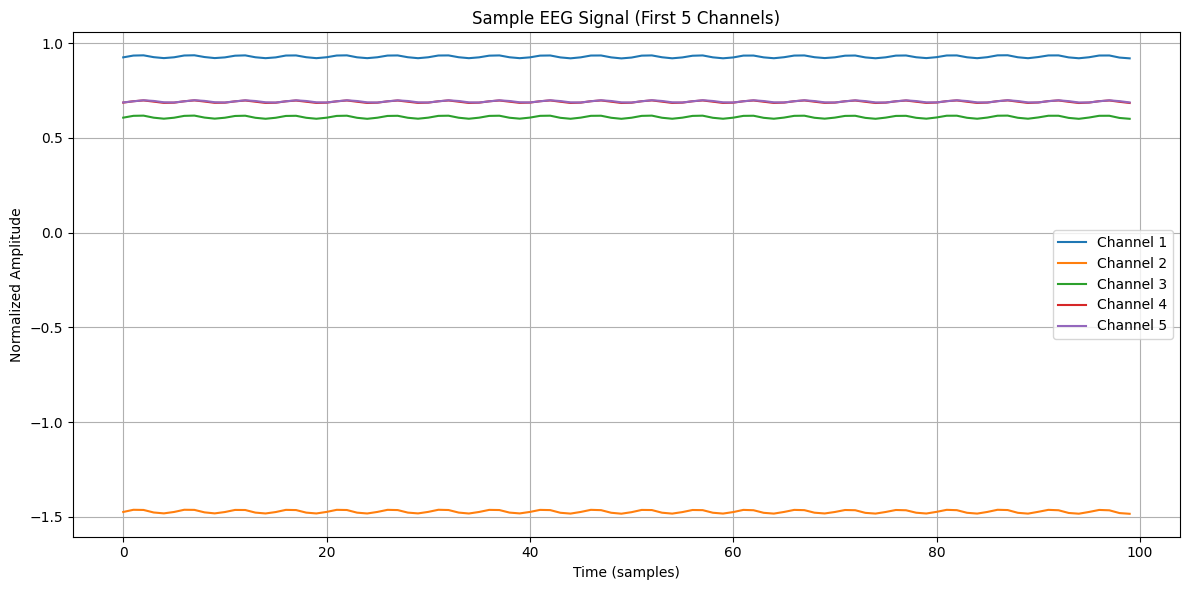

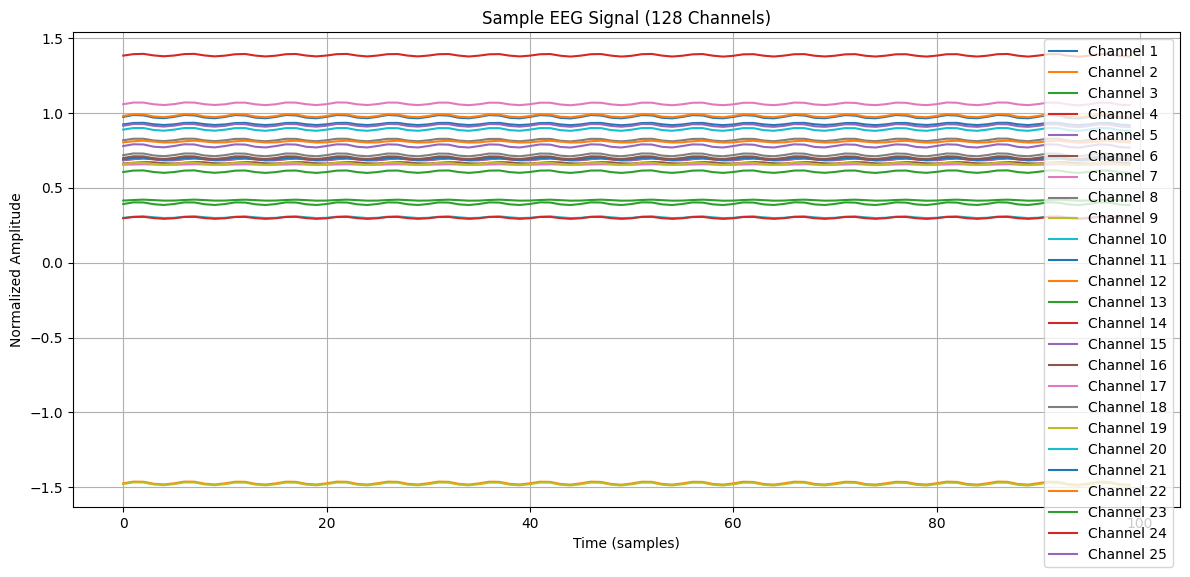

In [17]:
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Pick a file
file_path = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015/02010028rest 20160317 1538..mat"

# Load and extract EEG
mat = loadmat(file_path)
eeg_data = next((v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 2), None)

# Normalize
eeg_data = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

# Plot first 5 channels (time vs signal)
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(eeg_data[i, :100], label=f'Channel {i+1}')
plt.title("Sample EEG Signal (First 5 Channels)")
plt.xlabel("Time (samples)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

eeg_data = next((v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 2), None)

# Normalize
eeg_data = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

# Plot first 5 channels (time vs signal)
plt.figure(figsize=(12, 6))
for i in range(25):
    plt.plot(eeg_data[i, :100], label=f'Channel {i+1}')
plt.title("Sample EEG Signal (128 Channels)")
plt.xlabel("Time (samples)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
window_size = 250    # 1-second window (at 250 Hz)
stride = 125         # 50% overlap (0.5s)
num_channels = 128    # You can use 70 most active or top electrodes

In [19]:
from scipy.io import loadmat
import numpy as np
import os
from tqdm.notebook import tqdm

def load_segmented_eeg_dataset(
    folder, df_labels, window_size=250, stride=125, num_channels=128
):
    X, y, subject_ids = [], [], []

    mat_files = [f for f in os.listdir(folder) if f.endswith('.mat')]

    for file in tqdm(mat_files, desc="🧠 Segmenting EEG"):
        try:
            file_path = os.path.join(folder, file)
            subject_id = file.split('rest')[0][1:].replace('_', '').strip()
            label_row = df_labels[df_labels['subject id'] == subject_id]

            if label_row.empty:
                continue

            label = label_row['type'].values[0]
            if label not in ['HC', 'MDD']:
                continue

            mat = loadmat(file_path)
            eeg_data = next((v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 2), None)
            if eeg_data is None:
                continue

            # Remove padding channels
            if eeg_data.shape[0] > 128:
                eeg_data = eeg_data[:128, :]

            # Normalize per subject
            eeg_data = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

            # Use first N channels
            eeg_data = eeg_data[:num_channels, :]

            # Sliding window
            total_samples = eeg_data.shape[1]
            for start in range(0, total_samples - window_size + 1, stride):
                segment = eeg_data[:, start:start + window_size]
                X.append(segment.T)  # Shape: (window_size, channels)
                y.append(label)
                subject_ids.append(subject_id)

        except Exception as e:
            print(f"❌ Error in {file}: {e}")

    return np.array(X), np.array(y), subject_ids

In [20]:
import pandas as pd

resting_folder = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015"
label_file = "/kaggle/input/modma-dataset/EEG_128channels_ERP_lanzhou_2015/EEG_128channels_ERP_lanzhou_2015/subjects_information_EEG_128channels_ERP_lanzhou_2015.xlsx"
df_labels = pd.read_excel(label_file)
df_labels['subject id'] = df_labels['subject id'].astype(str).str.strip()

X_win, y_win, ids_win = load_segmented_eeg_dataset(resting_folder, df_labels)

print("✅ Segmented EEG shape:", X_win.shape)
print("✅ Labels:", np.unique(y_win, return_counts=True))

🧠 Segmenting EEG:   0%|          | 0/53 [00:00<?, ?it/s]

✅ Segmented EEG shape: (30854, 250, 128)
✅ Labels: (array(['HC', 'MDD'], dtype='<U3'), array([17556, 13298]))


In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels (HC = 0, MDD = 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_win)
y_cat = to_categorical(y_encoded)

print("✅ Encoded labels:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("✅ y_cat shape:", y_cat.shape)

✅ Encoded labels: {'HC': 0, 'MDD': 1}
✅ y_cat shape: (30854, 2)


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

# Get unique subject IDs
unique_subjects = list(set(ids_win))
train_ids, test_ids = train_test_split(unique_subjects, test_size=0.2, random_state=42)

# Build masks
train_mask = [sid in train_ids for sid in ids_win]
test_mask = [sid in test_ids for sid in ids_win]

# Apply masks
X_train = X_win[train_mask]
X_test = X_win[test_mask]
y_train = y_cat[train_mask]
y_test = y_cat[test_mask]

print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)

✅ X_train shape: (24189, 250, 128)
✅ X_test shape: (6665, 250, 128)


## CNN

In [23]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, InputLayer

model_cnn = Sequential([
    InputLayer(input_shape=(250, 128, 1)),  # Add channel dimension

    Conv2D(32, (5, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, (5, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 128, 32)        │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 250, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 64, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 125, 64, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 64, 64)         │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 125, 64, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 62, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 126976)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,253,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,284,994 (62.12 MB)

 Trainable params: 16,284,802 (62.12 MB)

 Non-trainable params: 192 (768.00 B)

In [25]:
# Add 1 channel dimension to make it (samples, 250, 128, 1)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

print("X_train shape for CNN:", X_train_cnn.shape)

X_train shape for CNN: (24189, 250, 128, 1)


In [26]:
history = model_cnn.fit(
    X_train_cnn,
    y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20


I0000 00:00:1749972836.603191     102 service.cc:148] XLA service 0x7d06b805e080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749972836.604613     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749972836.604637     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/378 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.5234 - loss: 15.3905  

I0000 00:00:1749972845.195130     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


378/378 ━━━━━━━━━━━━━━━━━━━━ 52s 107ms/step - accuracy: 0.9638 - loss: 1.7204 - val_accuracy: 0.5386 - val_loss: 21.0072
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9999 - loss: 2.3097e-04 - val_accuracy: 0.6734 - val_loss: 11.2500
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 1.0000 - loss: 3.1119e-04 - val_accuracy: 0.7100 - val_loss: 11.8546
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9986 - loss: 0.0150 - val_accuracy: 0.6288 - val_loss: 54.8489
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9971 - loss: 0.1072 - val_accuracy: 0.6753 - val_loss: 49.1465
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.6242 - val_loss: 46.4563
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9999 - loss: 8.0968e-05 - val_accuracy: 0.6411 - val_loss: 44.0547
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9999 - loss: 

209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
📊 CNN Classification Report (Segment-Level):
              precision    recall  f1-score   support

          HC       0.74      0.71      0.73      4206
         MDD       0.54      0.57      0.55      2459

    accuracy                           0.66      6665
   macro avg       0.64      0.64      0.64      6665
weighted avg       0.66      0.66      0.66      6665

✅ Accuracy: 0.6603150787696924


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


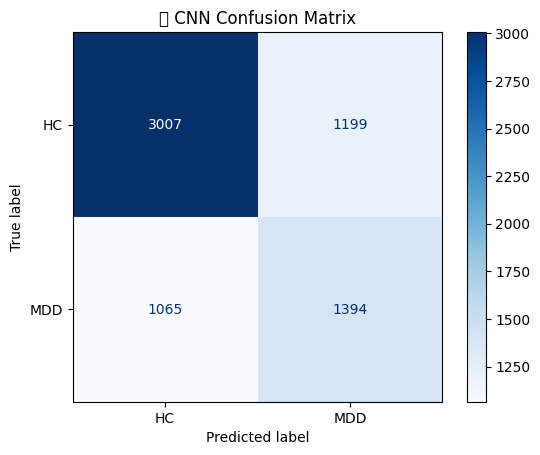

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict
y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("📊 CNN Classification Report (Segment-Level):")
print(classification_report(y_true, y_pred, target_names=["HC", "MDD"]))
print("✅ Accuracy:", accuracy_score(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HC", "MDD"])
disp.plot(cmap="Blues")
plt.title("🧠 CNN Confusion Matrix")
plt.show()

## LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, InputLayer

model_lstm = Sequential([
    InputLayer(input_shape=(250, 128)),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 250, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 250, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 250, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,322 (251.26 KB)

 Trainable params: 64,194 (250.76 KB)

 Non-trainable params: 128 (512.00 B)

In [29]:
# LSTM input shape: (samples, timesteps, features)
# Your data is already shaped as (250, 128), so no reshape needed
X_train_lstm = X_train
X_test_lstm = X_test

In [30]:
history_lstm = model_lstm.fit(
    X_train_lstm,
    y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9624 - loss: 0.1178 - val_accuracy: 0.6125 - val_loss: 2.3626
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 3.5863e-04 - val_accuracy: 0.6080 - val_loss: 2.9207
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 1.3292e-04 - val_accuracy: 0.5917 - val_loss: 3.3632
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 6.1135e-05 - val_accuracy: 0.5892 - val_loss: 3.6049
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 3.8511e-05 - val_accuracy: 0.5830 - val_loss: 3.8679
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 - loss: 1.9155e-05 - val_accuracy: 0.5835 - val_loss: 4.0476
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 1.8286e-05 - val_accuracy: 0.6078 - val_loss: 4.1616
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 1.0000 

209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
📊 LSTM Classification Report (Segment-Level):
              precision    recall  f1-score   support

          HC       1.00      0.36      0.52      4206
         MDD       0.48      1.00      0.64      2459

    accuracy                           0.59      6665
   macro avg       0.74      0.68      0.58      6665
weighted avg       0.81      0.59      0.57      6665

✅ Accuracy: 0.5933983495873969


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


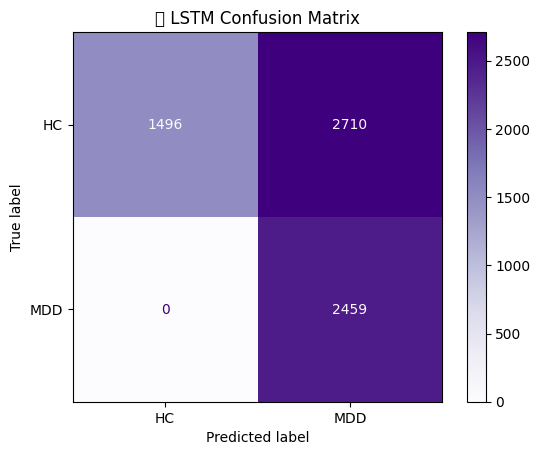

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
y_pred_lstm_probs = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm_probs, axis=1)
y_true_lstm = np.argmax(y_test, axis=1)

# Classification report
print("📊 LSTM Classification Report (Segment-Level):")
print(classification_report(y_true_lstm, y_pred_lstm, target_names=["HC", "MDD"]))
print("✅ Accuracy:", accuracy_score(y_true_lstm, y_pred_lstm))

# Confusion matrix
cm_lstm = confusion_matrix(y_true_lstm, y_pred_lstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["HC", "MDD"])
disp.plot(cmap="Purples")
plt.title("🧠 LSTM Confusion Matrix")
plt.show()

## CNN + LSTM (Hybrid)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, Dense, BatchNormalization, InputLayer

model_cnn_lstm = Sequential([
    InputLayer(input_shape=(250, 128)),

    Conv1D(64, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(32),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_cnn_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 250, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 250, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 125, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,962 (347.51 KB)

 Trainable params: 88,834 (347.01 KB)

 Non-trainable params: 128 (512.00 B)

In [33]:
history_cnn_lstm = model_cnn_lstm.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9629 - loss: 0.1111 - val_accuracy: 0.7163 - val_loss: 2.4025
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 - loss: 1.4170e-04 - val_accuracy: 0.6989 - val_loss: 2.8670
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 - loss: 4.1896e-05 - val_accuracy: 0.7010 - val_loss: 3.0952
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 - loss: 2.1668e-05 - val_accuracy: 0.6989 - val_loss: 3.3082
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 1.0000 - loss: 1.6353e-05 - val_accuracy: 0.7031 - val_loss: 3.4659
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 - loss: 9.6756e-06 - val_accuracy: 0.7128 - val_loss: 3.5178
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 - loss: 5.7798e-06 - val_accuracy: 0.7007 - val_loss: 3.7287
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 1.0000 

209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
📊 CNN + LSTM Classification Report (Segment-Level):
              precision    recall  f1-score   support

          HC       1.00      0.50      0.66      4206
         MDD       0.54      1.00      0.70      2459

    accuracy                           0.68      6665
   macro avg       0.77      0.75      0.68      6665
weighted avg       0.83      0.68      0.68      6665

✅ Accuracy: 0.6831207801950487


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


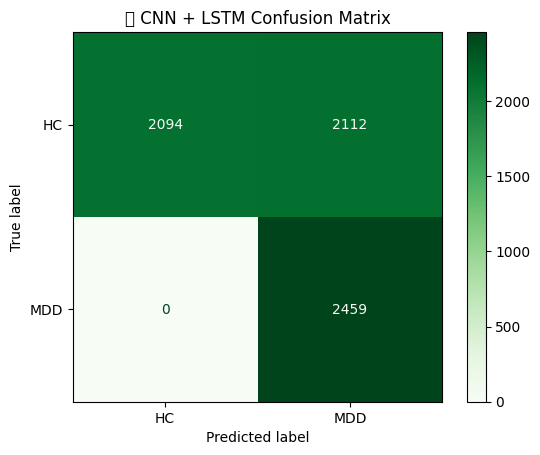

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on test segments
y_pred_cnn_lstm_probs = model_cnn_lstm.predict(X_test)
y_pred_cnn_lstm = np.argmax(y_pred_cnn_lstm_probs, axis=1)
y_true_cnn_lstm = np.argmax(y_test, axis=1)

# Report
print("📊 CNN + LSTM Classification Report (Segment-Level):")
print(classification_report(y_true_cnn_lstm, y_pred_cnn_lstm, target_names=["HC", "MDD"]))
print("✅ Accuracy:", accuracy_score(y_true_cnn_lstm, y_pred_cnn_lstm))

# Confusion matrix
cm = confusion_matrix(y_true_cnn_lstm, y_pred_cnn_lstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HC", "MDD"])
disp.plot(cmap="Greens")
plt.title("🧠 CNN + LSTM Confusion Matrix")
plt.show()

## prediction on single file

In [35]:
from scipy.io import loadmat
import numpy as np
import os

def predict_single_eeg_file_all_models(file_path, model, label_encoder=None,
                                       window_size=250, stride=125, num_channels=128):
    try:
        # Load .mat file
        mat = loadmat(file_path)
        eeg_data = next((v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 2), None)

        if eeg_data is None:
            raise ValueError("No valid EEG data array found in the .mat file.")

        # Trim padded channels if needed
        if eeg_data.shape[0] > num_channels:
            eeg_data = eeg_data[:num_channels, :]

        # Normalize EEG
        eeg_data = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

        # Sliding window segmentation
        segments = []
        total_samples = eeg_data.shape[1]
        for start in range(0, total_samples - window_size + 1, stride):
            segment = eeg_data[:, start:start + window_size]
            segments.append(segment.T)  # shape: (window_size, num_channels)

        X_input = np.array(segments)  # shape: (n_segments, 250, 128)

        # Check model input shape to detect CNN vs LSTM-type
        if model.input_shape[-1] == 1 and len(model.input_shape) == 4:
            # CNN expects shape (None, 250, 128, 1)
            X_input = np.expand_dims(X_input, axis=-1)

        # Predict on all segments
        probs = model.predict(X_input, verbose=0)
        preds = np.argmax(probs, axis=1)

        # Majority vote
        majority_class = np.bincount(preds).argmax()
        confidence = np.bincount(preds).max() / len(preds)

        # Decode label if encoder is provided
        if label_encoder:
            label = label_encoder.inverse_transform([majority_class])[0]
        else:
            label = 'HC' if majority_class == 0 else 'MDD'

        print(f"🧠 Prediction for file: {os.path.basename(file_path)}")
        print(f"✅ Predicted class: {label} (confidence: {confidence:.2f})")
        return label

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

In [45]:
file_path = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015/02010026rest 20160311 1421..mat"

print("\n🔍 CNN:")
predict_single_eeg_file_all_models(file_path, model=model_cnn, label_encoder=label_encoder)


🔍 CNN:
🧠 Prediction for file: 02010026rest 20160311 1421..mat
✅ Predicted class: MDD (confidence: 1.00)


'MDD'

In [46]:
file_path = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015/02020010rest 20150625 1224..mat"

print("\n🔍 LSTM:")
predict_single_eeg_file_all_models(file_path, model=model_lstm, label_encoder=label_encoder)



🔍 LSTM:
🧠 Prediction for file: 02020010rest 20150625 1224..mat
✅ Predicted class: HC (confidence: 1.00)


'HC'

In [40]:
file_path = "/kaggle/input/modma-dataset/EEG_128channels_resting_lanzhou_2015/EEG_128channels_resting_lanzhou_2015/02010026rest 20160311 1421..mat"

print("\n🔍 CNN + LSTM:")
predict_single_eeg_file_all_models(file_path, model=model_cnn_lstm, label_encoder=label_encoder)



🔍 CNN + LSTM:
🧠 Prediction for file: 02010026rest 20160311 1421..mat
✅ Predicted class: MDD (confidence: 1.00)


'MDD'